In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
sys.path.append('../src/')

In [3]:
# set plotting params
import matplotlib as mpl
import plots
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.reload_library()
rcparams = plots.stdrcparams()
mpl.rcParams.update(rcparams)

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)

In [5]:
carpediem_dir = r'../data/carpediem'
curated_dir = r'../data/curated'
mimic_dir = r'../data/mimiciv_included'
sil_dir = r'../data/calculated/silhouette'

# load silhouette scores

In [6]:
dfs = []
# for filename in os.listdir(sil_dir):
for filename in os.listdir(os.path.join(sil_dir, '240524_holdout')):
    if filename.startswith('sils'):

        parts = filename.replace('sils_', '').replace('_train0.5.csv', '').replace('_train0.9.csv', '').split('_')
        dataset = parts[0]
        feature_set = parts[1]
        scaler_name = parts[-1]
        imputation_strategy = '_'.join(parts[2:-1])

        file_path = os.path.join(sil_dir, '240524_holdout', filename)

        df = pd.read_csv(file_path)
        df['dataset'] = dataset
        dfs.append(df)

sils = pd.concat(dfs, ignore_index=True)

In [7]:
dfs = []
# for filename in os.listdir(sil_dir):
for filename in os.listdir(os.path.join(sil_dir, '240520_holdout')):
    if filename.startswith('sils'):

        parts = filename.replace('sils_', '').replace('_train0.5.csv', '').replace('_train0.9.csv', '').split('_')
        dataset = parts[0]
        feature_set = parts[1]
        scaler_name = parts[-1]
        imputation_strategy = '_'.join(parts[2:-1])

        file_path = os.path.join(sil_dir, '240520_holdout', filename)

        df = pd.read_csv(file_path)
        df['dataset'] = dataset
        dfs.append(df)

sils2 = pd.concat(dfs, ignore_index=True)

In [8]:
(sils.merge(sils2, how='outer').groupby(['dataset', 'feature_set', 'imputer', 'scaler']).size()==50).all()

True

In [9]:
sils = sils.merge(sils2, how='outer')

# script

In [10]:
scalers = ['Raw', 'KBD', 'MM', 'KBD+MM', 'SS', 'RS']
feature_sets = [
    'sofs', 'sofs+vtls', 'sofs+vtls+dmos1', 
    'sofs+vtls+dmos', 'sofs+vtls+dmos1+flgs', #'sofs+vtls+dmos1+vents', 
    'sofs+vtls+dmos1+lbs1', 'sofs+vtls+dmos1+lbs1+vents', 'sofs+vtls+dmos1+lbs2',
]
imputers = [
    'Complete_cases', 
    'CarryLastForward_limit1', 'CarryLastForward_limit2', 'CarryLastForward', 
    'KNN', 'MICE', 'FillZero'
]

/var/folders/bq/h_mr2101559bvvsl7rpwj9y1fy1_l0/T/ipykernel_39745/2334041332.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['SOFA', 'SOFA+Vitals', 'SOFA+Vitals\n+DMOS1 ', 'SOFA+Vitals\n+DMOS1&2', 'SOFA+Vitals\n+DMOS1\n+Flags', 'SOFA+Vitals\n+DMOS1\n+Labs1', 'SOFA+Vitals\n+DMOS1\n+Labs1+Vents', 'SOFA+Vitals\n+DMOS1\n+Labs1&2'])


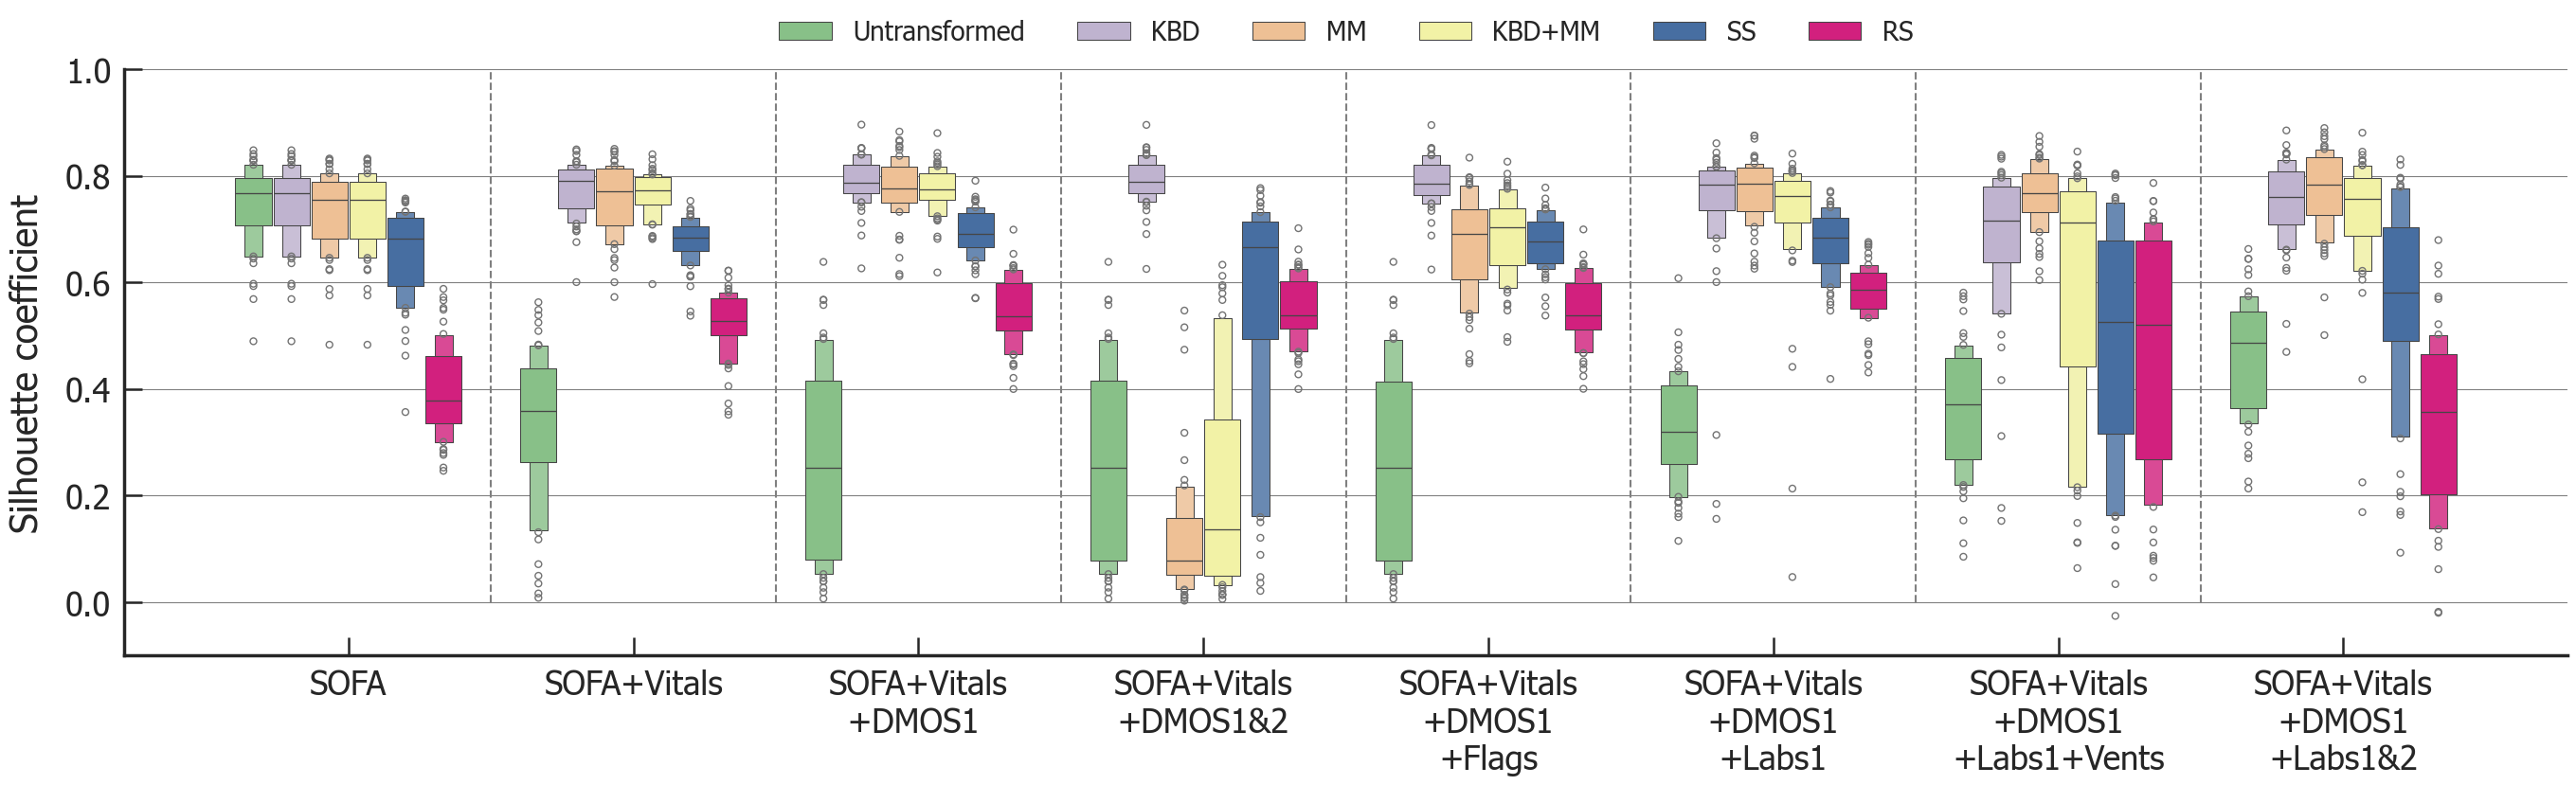

In [11]:
fig, ax = plt.subplots(figsize=plots.stdfigsize(nx=3, ny=1.2))

f1 = sils.dataset=='carpediem'
f2 = sils.imputer=='Complete_cases'
tmp = sils[f1 & f2]
sns.boxenplot(
    tmp, x='feature_set', y='sil', hue='scaler', 
    legend='auto', ax=ax, gap=0.05,
    palette=['#7fc97f','#beaed4','#fdc086','#ffff99','#386cb0','#f0027f'], 
    hue_order=scalers, 
    order=feature_sets
)
ax.set_ylabel('Silhouette coefficient')
ax.legend(frameon=False).set_title('')
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=6, labels=['Untransformed', 'KBD', 'MM', 'KBD+MM', 'SS', 'RS'])
plt.xticks(rotation=0)
ax.set_xlabel('')
ax.set_xticklabels(['SOFA', 'SOFA+Vitals', 'SOFA+Vitals\n+DMOS1 ', 'SOFA+Vitals\n+DMOS1&2', 'SOFA+Vitals\n+DMOS1\n+Flags', 'SOFA+Vitals\n+DMOS1\n+Labs1', 'SOFA+Vitals\n+DMOS1\n+Labs1+Vents', 'SOFA+Vitals\n+DMOS1\n+Labs1&2'])
ax.grid(axis='y', c='Gray')
ax.vlines(np.arange(0.5, 7, 1), 0, 1, color='Gray', linestyle='--')
ax.set_ylim(-.1, 1)
ax.set_yticks(np.arange(0, 1.1, .2))
plt.tight_layout()

# plt.savefig("../plots/sup/240530_carpediem_scalers.png", dpi=150, transparent=True, bbox_inches='tight')

In [12]:
sils['n_pairs_per'] = sils.n_pairs / sils.groupby(['dataset', 'feature_set']).n_pairs.transform('max')

In [13]:
print(sns.color_palette('BuPu', 3).as_hex())

['#bfd3e6', '#8c95c6', '#88409c']


/var/folders/bq/h_mr2101559bvvsl7rpwj9y1fy1_l0/T/ipykernel_39745/2793367960.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(['SOFA', 'SOFA+Vitals', 'SOFA+Vitals\n+DMOS1 ', 'SOFA+Vitals\n+DMOS1&2', 'SOFA+Vitals\n+DMOS1\n+Flags', 'SOFA+Vitals\n+DMOS1\n+Labs1', 'SOFA+Vitals\n+DMOS1\n+Labs1+Vents', 'SOFA+Vitals\n+DMOS1\n+Labs1&2'])


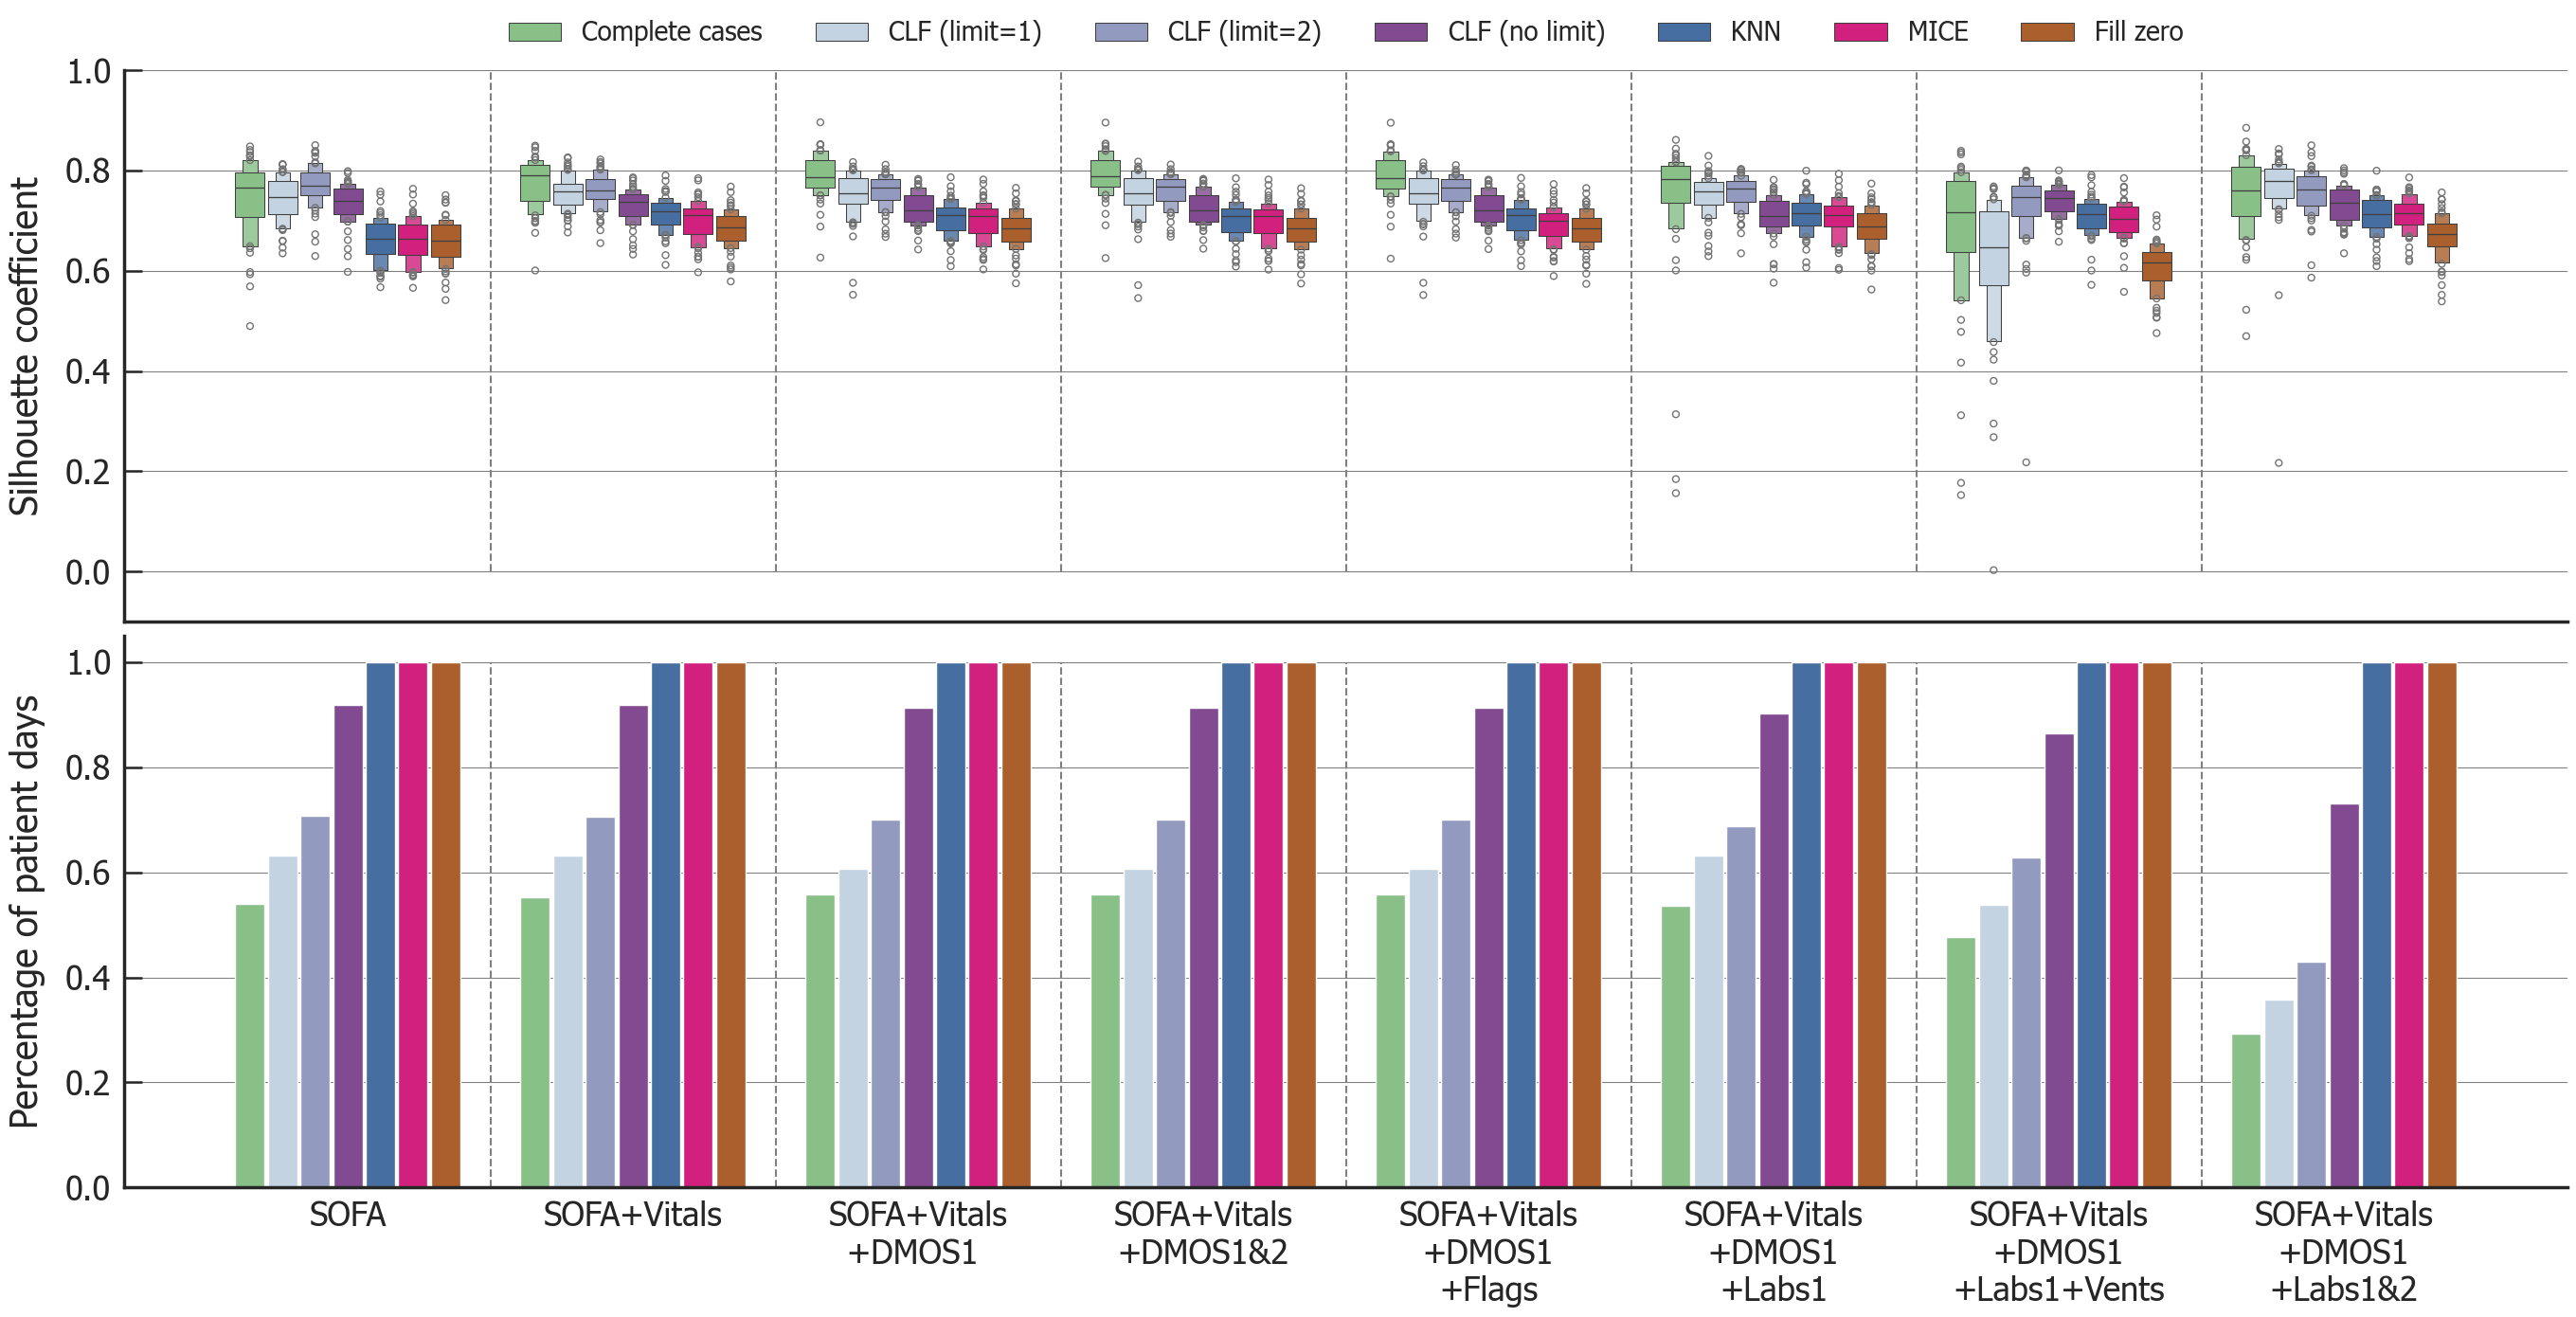

In [14]:
fig, axs = plt.subplots(2,1, figsize=plots.stdfigsize(nx=3, ny=2))

f2 = sils.dataset=='carpediem'
f3 = sils.scaler=='KBD'

sns.boxenplot(
    sils[f2&f3], x='feature_set', y='sil', hue='imputer', 
    legend='auto', ax=axs[0], gap=0.1,
    palette=['#7fc97f','#bfd3e6', '#8c95c6', '#88409c','#386cb0','#f0027f','#bf5b17'], 
    hue_order=imputers, 
    order=feature_sets
)
axs[0].set_xticks([])  
axs[0].set_xlabel('')
axs[0].set_ylabel('Silhouette coefficient')
axs[0].set_ylim(-.1, 1)
axs[0].set_yticks(np.arange(0, 1.1, .2))
axs[0].vlines(np.arange(0.5, 7, 1), 0, 1, color='Gray', linestyle='--')
sns.barplot(
    sils[f2&f3], x='feature_set', y='n_pairs_per', hue='imputer', 
    legend=False, ax=axs[1], gap=0.1, 
    palette=['#7fc97f','#bfd3e6', '#8c95c6', '#88409c','#386cb0','#f0027f','#bf5b17'],
    hue_order=imputers, 
    order=feature_sets
)
axs[1].set_xlabel('')
axs[1].set_ylabel('Percentage of patient days')
axs[0].legend(frameon=False).set_title('')
sns.move_legend(axs[0], "lower center", bbox_to_anchor=(.5, 1), ncol=7, labels=['Complete cases', 'CLF (limit=1)', 'CLF (limit=2)', 'CLF (no limit)', 'KNN', 'MICE', 'Fill zero'])
# plt.xticks(rotation=45, ha='right')
axs[0].grid(axis='y', c='Gray')
axs[1].grid(axis='y', c='Gray')
axs[1].set_xlabel('')
axs[1].set_xticklabels(['SOFA', 'SOFA+Vitals', 'SOFA+Vitals\n+DMOS1 ', 'SOFA+Vitals\n+DMOS1&2', 'SOFA+Vitals\n+DMOS1\n+Flags', 'SOFA+Vitals\n+DMOS1\n+Labs1', 'SOFA+Vitals\n+DMOS1\n+Labs1+Vents', 'SOFA+Vitals\n+DMOS1\n+Labs1&2'])
axs[1].vlines(np.arange(0.5, 7, 1), 0, 1, color='Gray', linestyle='--')
plt.tight_layout()

# plt.savefig("../plots/sup/240530_carpediem_imputers.png", dpi=150, transparent=True, bbox_inches='tight')

# mimic

In [15]:
scalers = ['Raw', 'KBD', 'MM', 'KBD+MM', 'SS', 'RS']
feature_sets = [
    'sofs', 'sofs+vtls', 'sofs+vtls+dmos', 
    'sofs+vtls+dmos+lbs1', 'sofs+vtls+dmos+lbs2'#, 'sofs+vtls+dmos+lbs'
]
imputers = [
    'Complete_cases', 
    'CarryLastForward_limit1', 'CarryLastForward_limit2', 'CarryLastForward', 
    'KNN', 'MICE', 'FillZero'
]

/var/folders/bq/h_mr2101559bvvsl7rpwj9y1fy1_l0/T/ipykernel_39745/2363990951.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['SOFA', 'SOFA+Vitals', 'SOFA+Vitals\n+DMOS1', 'SOFA+Vitals\n+DMOS1\n+Labs1', 'SOFA+Vitals\n+DMOS1\n+Labs1&2'])


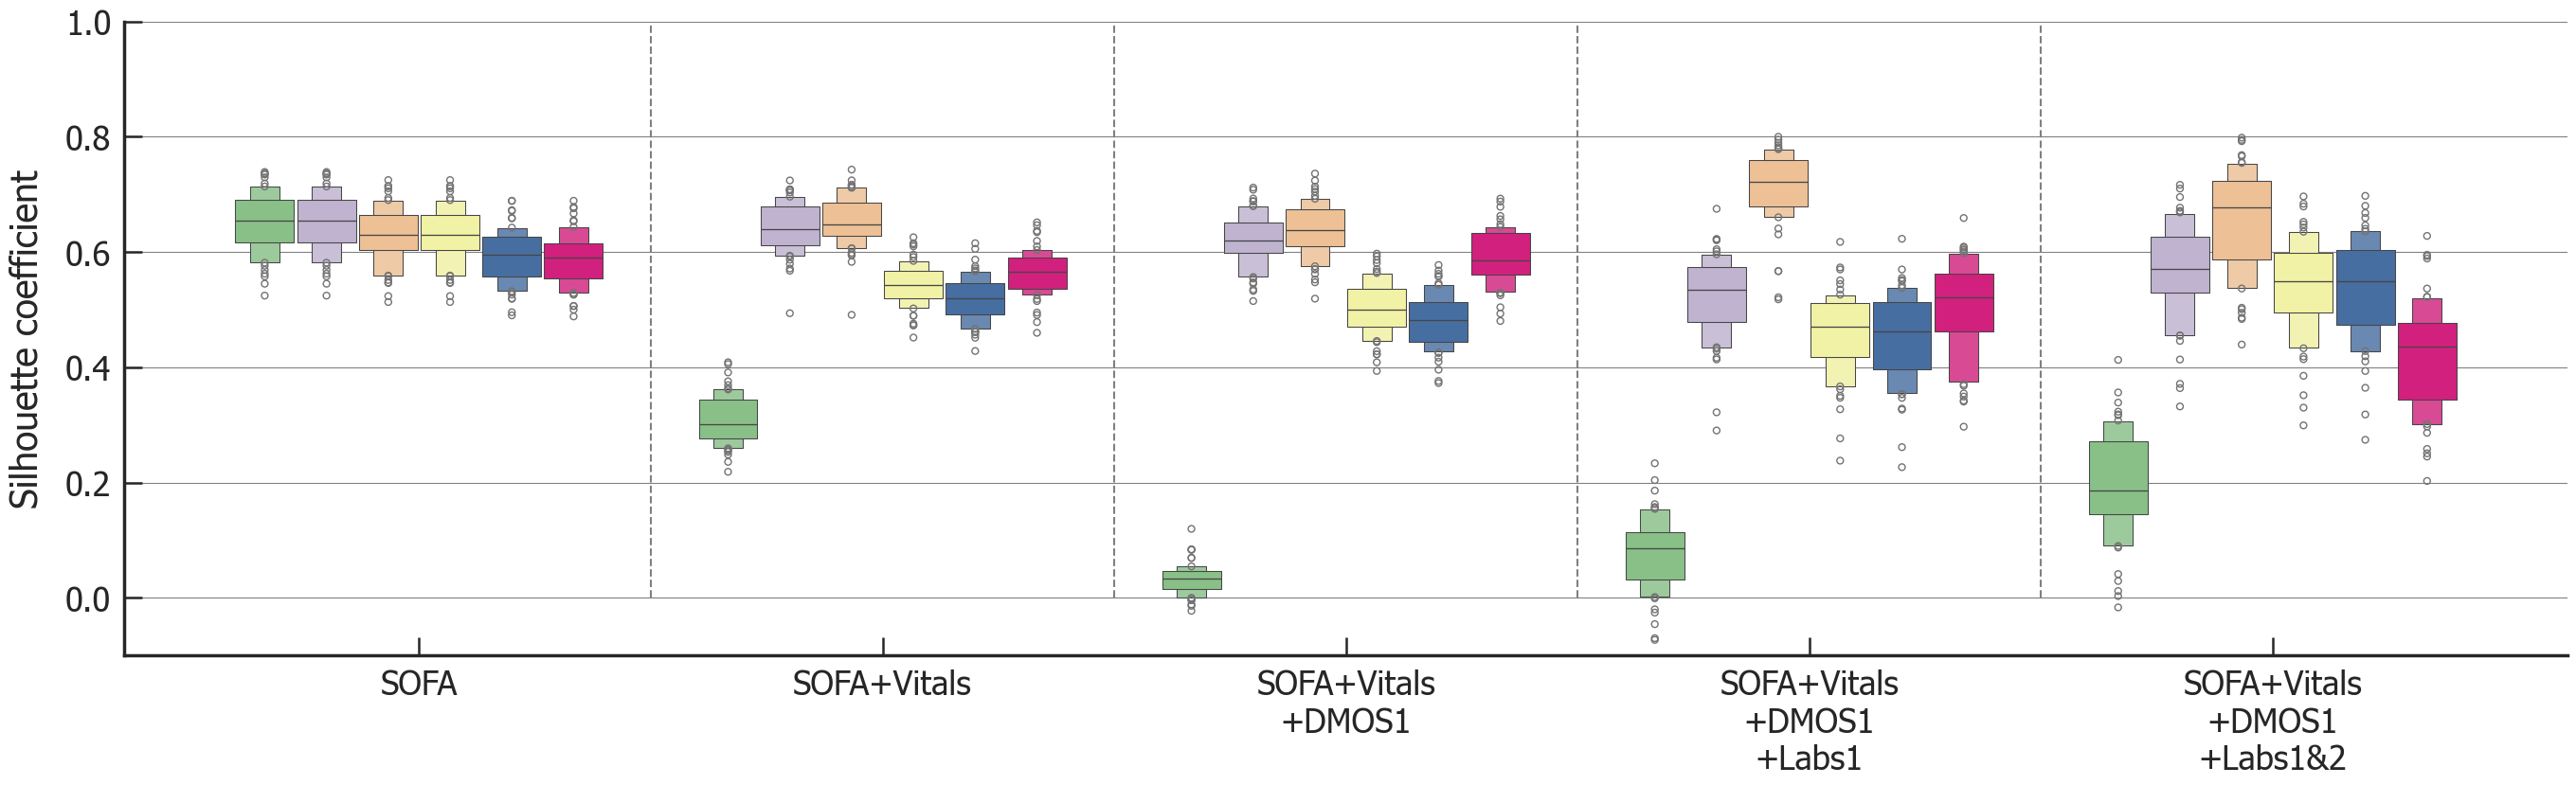

In [16]:
fig, ax = plt.subplots(figsize=plots.stdfigsize(nx=3, ny=1.2))

f1 = sils.dataset=='mimic'
f2 = sils.imputer=='Complete_cases'
tmp = sils[f1 & f2]
sns.boxenplot(
    tmp, x='feature_set', y='sil', hue='scaler', 
    legend=False, ax=ax, gap=0.05,
    palette=['#7fc97f','#beaed4','#fdc086','#ffff99','#386cb0','#f0027f'], 
    hue_order=scalers, 
    order=feature_sets
)
ax.set_ylabel('Silhouette coefficient')
# ax.legend(frameon=False).set_title('')
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# plt.xticks(rotation=45, ha='right')
ax.set_xlabel('')
ax.set_xticklabels(['SOFA', 'SOFA+Vitals', 'SOFA+Vitals\n+DMOS1', 'SOFA+Vitals\n+DMOS1\n+Labs1', 'SOFA+Vitals\n+DMOS1\n+Labs1&2'])
ax.grid(axis='y', c='Gray')
ax.vlines(np.arange(0.5, 4, 1), 0, 1, color='Gray', linestyle='--')
ax.set_ylim(-.1, 1)
ax.set_yticks(np.arange(0, 1.1, .2))
plt.tight_layout()

# plt.savefig("../plots/sup/240530_carpediem_scalers.png", dpi=150, transparent=True, bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/bq/h_mr2101559bvvsl7rpwj9y1fy1_l0/T/ipykernel_39745/411155615.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(['SOFA', 'SOFA+Vitals', 'SOFA+Vitals\n+DMOS1', 'SOFA+Vitals\n+DMOS1\n+Labs1', 'SOFA+Vitals\n+DMOS1\n+Labs1&2'])


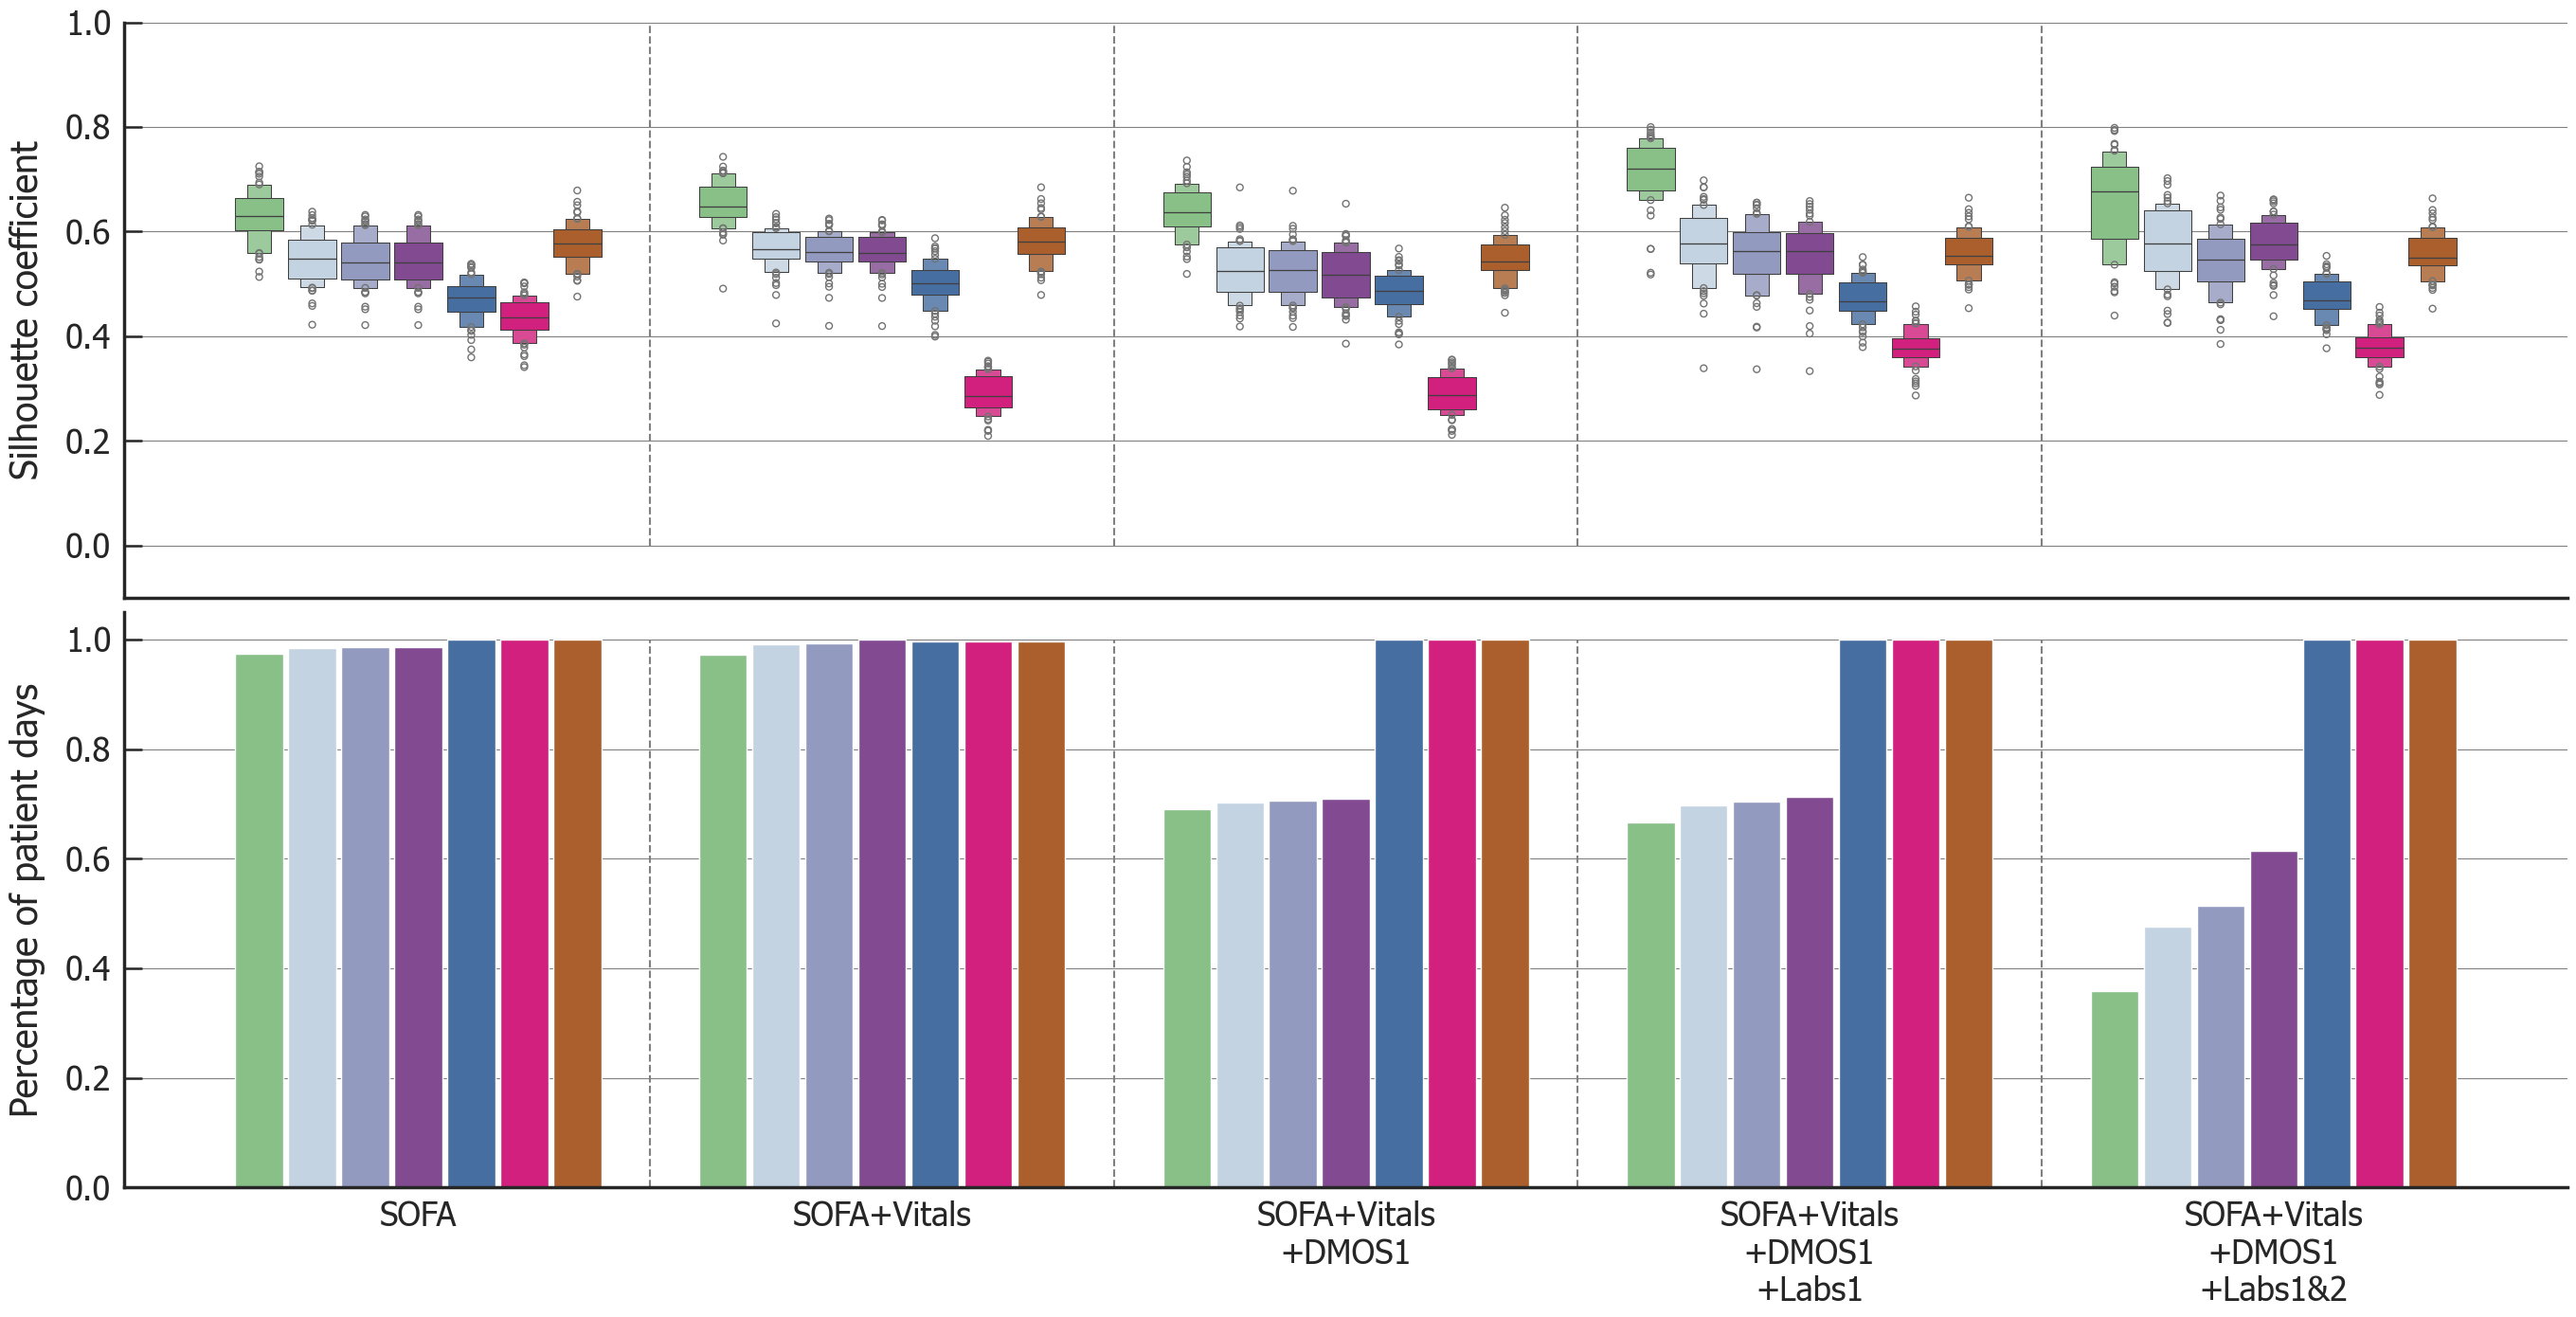

In [17]:
fig, axs = plt.subplots(2,1, figsize=plots.stdfigsize(nx=3, ny=2))

f2 = sils.dataset=='mimic'
f3 = sils.scaler=='MM'

sns.boxenplot(
    sils[f2&f3], x='feature_set', y='sil', hue='imputer', 
    legend=False, ax=axs[0], gap=0.1,
    palette=['#7fc97f','#bfd3e6', '#8c95c6', '#88409c','#386cb0','#f0027f','#bf5b17'], 
    hue_order=imputers, 
    order=feature_sets
)
axs[0].set_xticks([])  
axs[0].set_xlabel('')
axs[0].set_ylabel('Silhouette coefficient')
axs[0].set_ylim(-.1, 1)
axs[0].set_yticks(np.arange(0, 1.1, .2))
axs[0].vlines(np.arange(0.5, 4, 1), 0, 1, color='Gray', linestyle='--')
sns.barplot(
    sils[f2&f3], x='feature_set', y='n_pairs_per', hue='imputer', 
    legend=False, ax=axs[1], gap=0.1, 
    palette=['#7fc97f','#bfd3e6', '#8c95c6', '#88409c','#386cb0','#f0027f','#bf5b17'],
    hue_order=imputers, 
    order=feature_sets
)
axs[1].set_xlabel('')
axs[1].set_ylabel('Percentage of patient days')
axs[0].legend(frameon=False).set_title('')
# sns.move_legend(axs[0], "upper left", bbox_to_anchor=(1, 1))
# plt.xticks(rotation=45, ha='right')
axs[0].grid(axis='y', c='Gray')
axs[1].grid(axis='y', c='Gray')
axs[1].set_xlabel('')
axs[1].set_xticklabels(['SOFA', 'SOFA+Vitals', 'SOFA+Vitals\n+DMOS1', 'SOFA+Vitals\n+DMOS1\n+Labs1', 'SOFA+Vitals\n+DMOS1\n+Labs1&2'])
axs[1].vlines(np.arange(0.5, 4, 1), 0, 1, color='Gray', linestyle='--')
plt.tight_layout()

# plt.savefig("../plots/sup/240530_carpediem_imputers.png", dpi=150, transparent=True, bbox_inches='tight')